<a href="https://colab.research.google.com/github/Manish1176/Machine-Learning-Project/blob/main/Predict_Consumer_Electronics_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("/content/consumer_electronics_sales_data.csv")

In [5]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [7]:
df.shape

(9000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [9]:
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [10]:
df.head(1)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0


In [11]:
df['ProductCategory'].value_counts()

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

In [12]:
df['ProductBrand'].value_counts()

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

In [15]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [16]:
df.duplicated().sum()

0

In [17]:
df.head(2)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

In [19]:
df.head(2)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1


In [7]:
df.drop('ProductID',axis=1,inplace=True)

In [22]:
df.head(1)

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,3,2,312.949668,18,0,2,1,0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

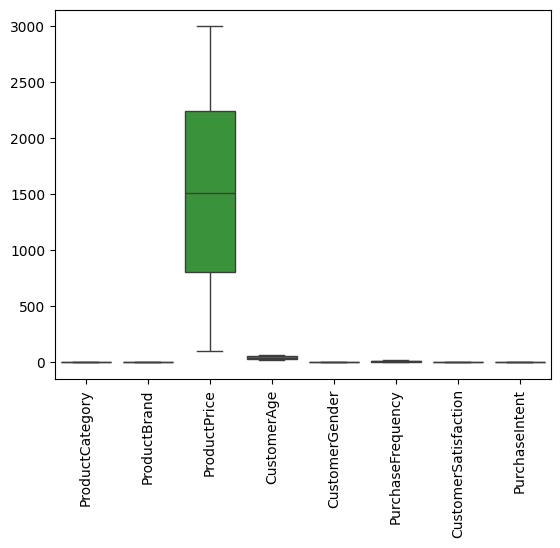

In [25]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

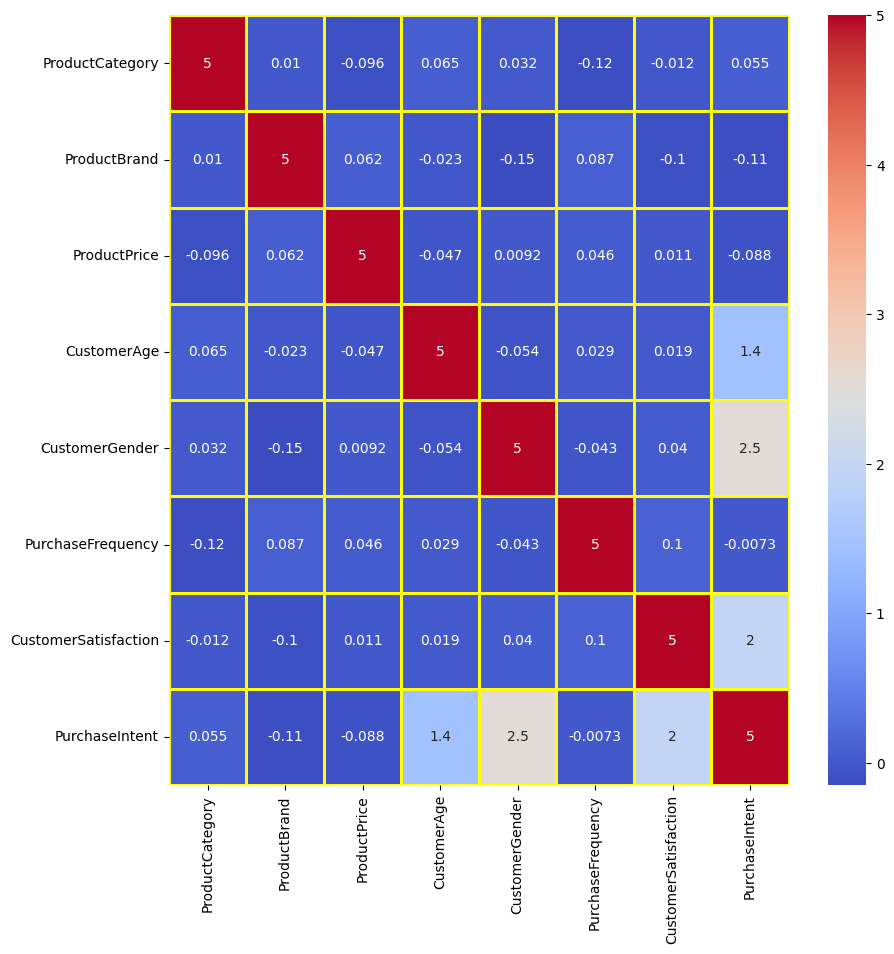

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()*5,annot=True,cmap='coolwarm',linecolor='yellow',linewidths=1)
plt.show()

In [8]:
X = df.drop('PurchaseIntent',axis=1)
y = df['PurchaseIntent']

In [31]:
y

0       0
1       1
2       1
3       1
4       0
       ..
8995    0
8996    1
8997    0
8998    1
8999    1
Name: PurchaseIntent, Length: 9000, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9527777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       793
           1       0.95      0.97      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

Confusion Matrix:
 [[742  51]
 [ 34 973]]


In [12]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)

y_pred_ridge = ridge_clf.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))

Accuracy: 0.8505555555555555


In [18]:
df.head(4)

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,3,2,312.949668,18,0,2,1,0
1,2,3,980.389404,35,1,7,2,1
2,4,3,2606.718293,63,0,1,5,1
3,3,3,870.395450,63,1,10,3,1


In [20]:
input_data = (3,2,312.949668,18,0,2,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 0:
  print('No Purchase')
else:
  print('Purchase')

[0]
No Purchase


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import pickle
pickle.dump(model,open('model.pkl','wb'))